In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv("survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
data.shape

(309, 16)

ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 309.

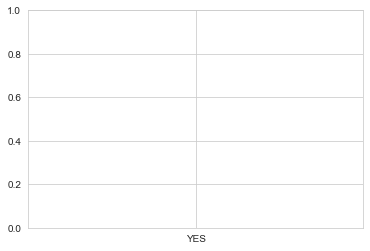

In [151]:
plt.scatter(data['LUNG_CANCER'],data['AGE'],color=['r','b'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter plot on Iris dataset')

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="ALCOHOL CONSUMING", size=3) \
   .map(plt.scatter, "ALCOHOL CONSUMING", "AGE") \
   .add_legend()
plt.show()

In [ ]:
plt.scatter(data["AGE"],data["ALCOHOL CONSUMING"],color="blue",label="1",alpha=0.3)
plt.scatter(data["AGE"],data["ALCOHOL CONSUMING"],color="red",label="2",alpha=0.2)
plt.xlabel("AGE")
plt.ylabel("ALCOHOL CONSUMING")
plt.legend()
plt.show()

In [152]:
pd.DataFrame(data["ALCOHOL CONSUMING"].value_counts())

,ALCOHOL CONSUMING
2,172
1,137


In [153]:
data['AGE'] = pd.cut(data.AGE,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

Text(0.5, 1.0, 'coughing')

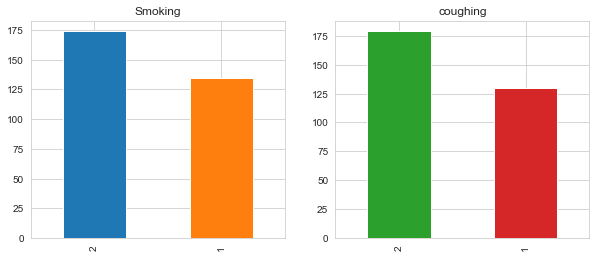

In [154]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);data.SMOKING.value_counts().plot(kind='bar',color=['C0','C1']); plt.title("Smoking")
plt.subplot(1,2,2);data.COUGHING.value_counts().plot(kind='bar',color=['C2','C3']); plt.title("coughing")


Text(0.5, 1.0, 'Anxiety')

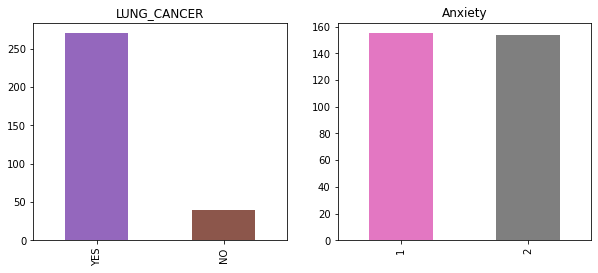

In [32]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);data.LUNG_CANCER.value_counts().plot(kind='bar',color=['C4','C5']); plt.title("LUNG_CANCER")
plt.subplot(1,2,2);data.ANXIETY.value_counts().plot(kind='bar',color=['C6','C7']); plt.title("Anxiety")

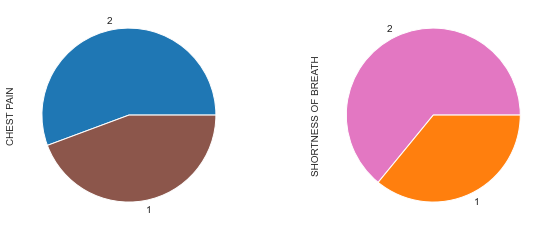

In [156]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);data['CHEST PAIN'].value_counts().plot(kind='pie',colors=['C0','C5']); 
plt.subplot(1,2,2);data['SHORTNESS OF BREATH'].value_counts().plot(kind='pie',colors=['C6','C1']); 

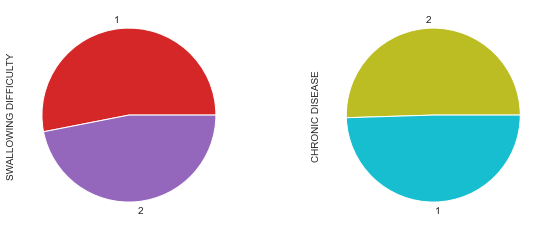

In [157]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);data['SWALLOWING DIFFICULTY'].value_counts().plot(kind='pie',colors=['C3','C4']); 
plt.subplot(1,2,2);data['CHRONIC DISEASE'].value_counts().plot(kind='pie',colors=['C8','C9']); 

In [158]:
data.stack().plot(kind='bar',stacked=True)

TypeError: no numeric data to plot

In [ ]:
ax=sns.barplot(x='AGE',y='SMOKING',data=data)

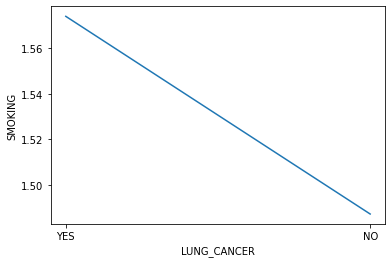

In [34]:
ax = sns.lineplot(x="LUNG_CANCER",y="SMOKING",data=data,ci=None,palette="Paired")

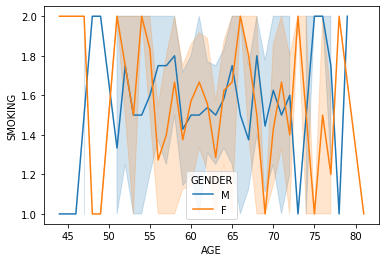

In [41]:

ax=sns.lineplot(x='AGE',y='SMOKING',hue='GENDER',data=data)

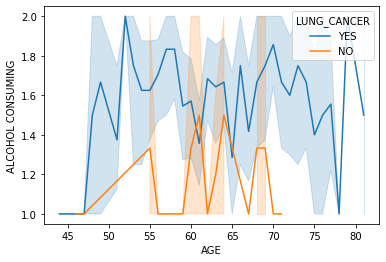

In [42]:

ax=sns.lineplot(x='AGE',y='ALCOHOL CONSUMING',hue='LUNG_CANCER',data=data)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.info()

In [ ]:
data.nunique()

In [ ]:
data.columns

In [5]:
df=data[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]
for i in df:
    print(i,data[i].unique())

GENDER ['M' 'F']
AGE [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING [1 2]
YELLOW_FINGERS [2 1]
ANXIETY [2 1]
PEER_PRESSURE [1 2]
CHRONIC DISEASE [1 2]
FATIGUE  [2 1]
ALLERGY  [1 2]
WHEEZING [2 1]
ALCOHOL CONSUMING [2 1]
COUGHING [2 1]
SHORTNESS OF BREATH [2 1]
SWALLOWING DIFFICULTY [2 1]
CHEST PAIN [2 1]
LUNG_CANCER ['YES' 'NO']


In [6]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
data['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [8]:
counts=data['GENDER'].value_counts()
counts

M    162
F    147
Name: GENDER, dtype: int64

In [25]:
df['GENDER'].replace({'M':1, 'F':0},inplace=True)#male=1,female=0
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [10]:
data['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [11]:
df['LUNG_CANCER'].replace({'YES':1, 'NO':0},inplace=True)#YES=1,NO=0
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

<AxesSubplot:>

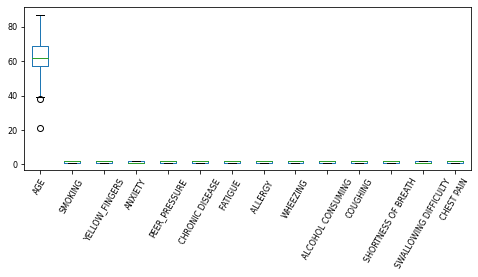

In [24]:
plt.figure(figsize=(8,3))
data.boxplot(grid=False, rot=60, fontsize=8) 
#boxplot of each varible together

In [14]:
q1=data['AGE'].quantile(0.25)
q3=data['AGE'].quantile(0.75)

iqr=q3-q1

lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr

print(lower_trial)
print(upper_trial)

39.0
87.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


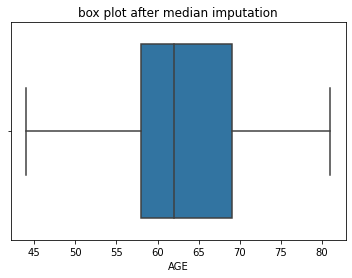

In [17]:
q1=data['AGE'].quantile(0.25)
q3=data['AGE'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(data['AGE'])
for i in data['AGE']:
    if i>upper_trial or i<lower_trial:
        data['AGE']=data['AGE'].replace(i,med)
sns.boxplot(data['AGE'])
plt.title("box plot after median imputation")
plt.show()


In [16]:
data.skew(axis=0,skipna=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8184\3374440273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis=0,skipna=True)


AGE                      0.062706
SMOKING                 -0.255705
YELLOW_FINGERS          -0.282425
ANXIETY                  0.006504
PEER_PRESSURE           -0.006504
CHRONIC DISEASE         -0.019513
FATIGUE                 -0.741836
ALLERGY                 -0.229118
WHEEZING                -0.229118
ALCOHOL CONSUMING       -0.229118
COUGHING                -0.322786
SHORTNESS OF BREATH     -0.589714
SWALLOWING DIFFICULTY    0.123812
CHEST PAIN              -0.229118
dtype: float64

In [ ]:
df.corr()

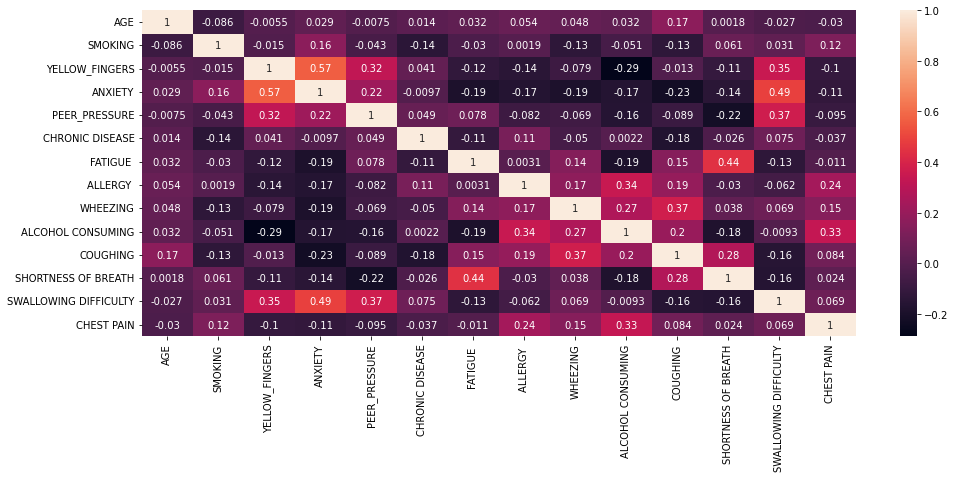

In [20]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [21]:
data['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [22]:
df.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [23]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [24]:
q = df.drop(['LUNG_CANCER'],axis=1)
w = df['LUNG_CANCER']
q_resampled, w_resampled = SMOTE().fit_resample(q,w)

In [25]:
q = df.drop(['LUNG_CANCER'],axis=1)
w = df['LUNG_CANCER']

print(q.shape)
print(w.shape)

(309, 15)
(309,)


In [26]:
w_resampled.value_counts()

1    270
0    270
Name: LUNG_CANCER, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


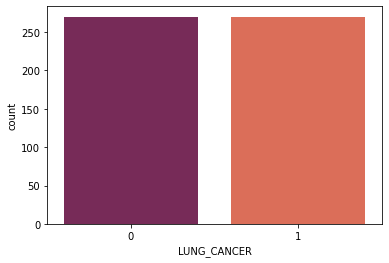

In [27]:
sns.countplot(w_resampled,label='counts',palette='rocket')
plt.show()

In [28]:
data.to_csv("final_eda.csv",index=False)

In [29]:
q_resampled.shape

(540, 15)

In [30]:
w_resampled.shape

(540,)

In [31]:
x=df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN','GENDER']]
y=df['LUNG_CANCER']

In [32]:
print(x.shape)
print(y.shape)

(309, 15)
(309,)


In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(q_resampled , w_resampled ,test_size=0.2,random_state=1)

In [34]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(432, 15)
(432,)
(108, 15)
(108,)


In [35]:
x_train.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
16,1,75,2,1,1,1,2,1,2,2,2,2,2,1,2
85,1,60,1,2,2,1,1,1,1,2,2,2,2,2,1
517,0,59,1,1,1,1,1,2,1,1,1,1,2,1,1


In [36]:
x_test.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
65,0,71,2,2,2,2,2,2,1,2,1,2,1,2,2
402,0,58,1,1,1,1,1,2,1,1,1,1,2,1,1
445,1,54,1,2,1,1,1,1,1,1,1,1,1,1,1


# logistic 

In [37]:
#logistic regression-binary data
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.metrics import accuracy_score
print("LR:",accuracy_score(y_test,y_pred)*100)

LR: 96.29629629629629


# logistic 96.2962


In [39]:
#confusion matrix which will tell where the machine gone wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[55  3]
 [ 1 49]]


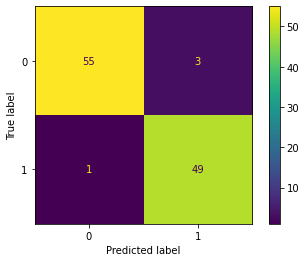

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd=ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
cmd.plot()
#true_label-y_test,predicted label-y_pred

# knn

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

print(accuracy_score(y_test,y_pred)*100)

92.5925925925926


# knn =93.5185

In [42]:
#confusion matrix which will tell where the machine gone wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56  2]
 [ 6 44]]


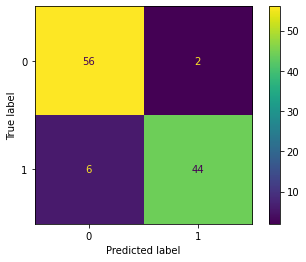

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd=ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
cmd.plot()

# gaussian

In [44]:
#guassianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

91.66666666666666


# guassian = 91.66666666

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[51  7]
 [ 2 48]]


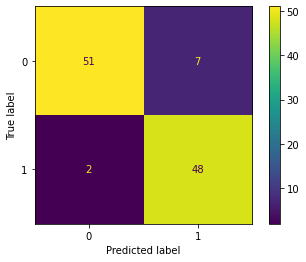

In [46]:
cmd=ConfusionMatrixDisplay(cm,display_labels=gnb.classes_)
cmd.plot()

# svm

In [47]:
#support vector classifier
from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

90.74074074074075


# svm=90.740

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[51  7]
 [ 3 47]]


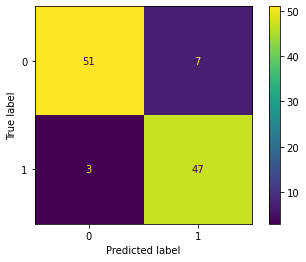

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm,display_labels=sv.classes_)
cmd.plot()

# decision tree

In [50]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

94.44444444444444


# decision tree=92.5925

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56  2]
 [ 4 46]]


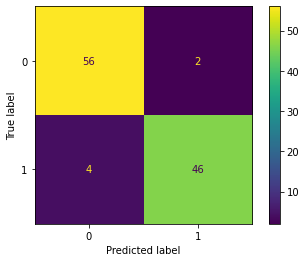

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm,display_labels=dt.classes_)
cmd.plot()

# random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

95.37037037037037


# random forest=95.3703

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[57  1]
 [ 4 46]]


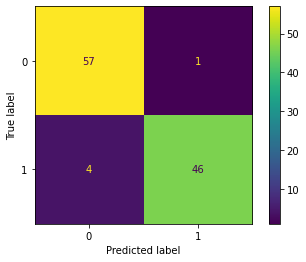

In [55]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
cmd.plot()

# here we observe that logistic model has higest accuracy(96.2962) than other.

In [56]:
import pickle

In [ ]:
pickle.dump(lr,open('lungmodel.pkl','wb'))

In [ ]:
print(x.head(3))
print(y.head(3))

In [ ]:
df=[1,62,1,1,1,2,1,2,2,2,2,1,1,2,1]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model=pickle.load(open('lungmodel.pkl','rb'))
import numpy as np
arr=np.array(df).reshape(1,-1)

result=model.predict(arr)
print(result[0])